# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

### Загрузка данных

In [2]:
# загрузка файлов с указанием разделителя и десятичного знака

geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv', delimiter=',')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv', delimiter=',')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv', delimiter=',')

In [3]:
# выводим первые 5 строк geo_data_0

geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
# выводим первые 5 строк geo_data_1

geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
# выводим первые 5 строк geo_data_2

geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### Предобработка данных

In [6]:
# смотрим информацию про датасет geo_data_0

geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# смотрим количество пропусков

geo_data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [8]:
# Выведем на экран количество строк-дубликатов

geo_data_0.duplicated().sum()

# Дубликатов не обнаружено

0

In [9]:
# Проверка основных статистик

geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


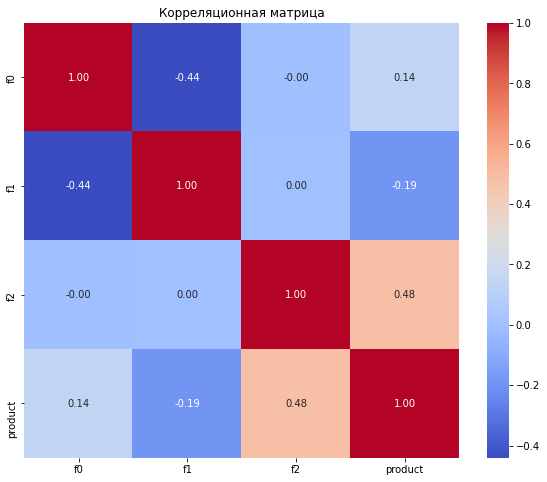

In [10]:
correlation_matrix = geo_data_0.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()
   

In [11]:
# смотрим информацию про датасет geo_data_1

geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
# смотрим количество пропусков

geo_data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
# Выведем на экран количество строк-дубликатов

geo_data_1.duplicated().sum()

# Дубликатов не обнаружено

0

In [14]:
# Проверка основных статистик

geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


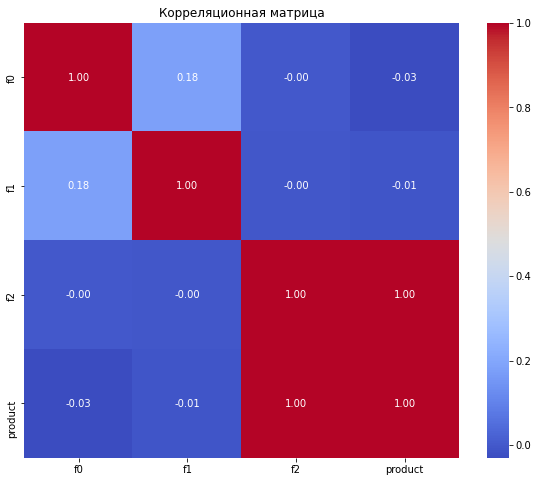

In [15]:
correlation_matrix = geo_data_1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()
   

In [16]:
# смотрим информацию про датасет geo_data_2

geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [17]:
# смотрим количество пропусков

geo_data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [18]:
# Выведем на экран количество строк-дубликатов

geo_data_2.duplicated().sum()

# Дубликатов не обнаружено

0

In [19]:
# Проверка основных статистик

geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


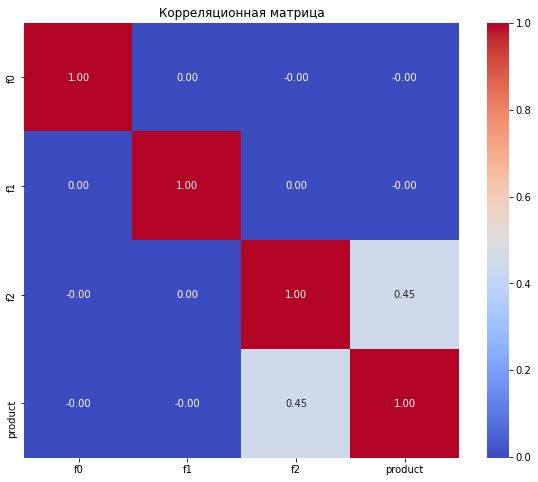

In [20]:
correlation_matrix = geo_data_2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()
   

**Вывод:**

Мы провели осмотр и первоначальную обработку данных. Дубликатов не выявлено, тип данных пригоден для анализ. Во втором датасете (geo_data_1) обнаружена высокая корреляция признака f2 с продуктом.

## Обучение и проверка модели

**geo_data_0**

In [21]:
# Разбейте данные на обучающую и валидационную выборки в соотношении 75:25
# Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Делим на тренировочную и тестовую выборки и удаляем целевой признак из датасета
X_train0, X_test0, y_train0, y_test0 = train_test_split(
    geo_data_0.drop(['product', 'id'], axis=1),
    geo_data_0['product'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
)

# Обучите модель и сделайте предсказания на валидационной выборке

# Создаем и обучаем модель линейной регрессии
model0 = LinearRegression()
model0.fit(X_train0, y_train0)

# Делаем предсказания на тестовой (валидационной) выборке
predictions0 = model0.predict(X_test0)
# Сохраняем предсказания валидационной выборки
predictions_df0 = pd.DataFrame({
    'Predicted': predictions0,
    'Actual': y_test0
})

# Сохраняем DataFrame в файл
predictions_df0.to_csv('predictions0.csv', index=False)
# Рассчитываем средний запас предсказанного сырья
mean_predicted_reserves0 = np.mean(predictions0)

# Рассчитываем RMSE модели
rmse = np.sqrt(mean_squared_error(y_test0, predictions0))

# Печатаем результаты на экране
print(f"Средний запас предсказанного сырья: {mean_predicted_reserves0:.2f}")
print(f"RMSE модели: {rmse:.2f}")

Средний запас предсказанного сырья: 92.40
RMSE модели: 37.76


**geo_data_1**

In [22]:
# Разбейте данные на обучающую и валидационную выборки в соотношении 75:25
# Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Делим на тренировочную и тестовую выборки 
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    geo_data_1.drop(['product', 'id'], axis=1),
    geo_data_1['product'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=geo_data_1['product']
)

# Обучите модель и сделайте предсказания на валидационной выборке

# Создаем и обучаем модель линейной регрессии
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

# Делаем предсказания на тестовой (валидационной) выборке
predictions1 = model1.predict(X_test1)
# Сохраняем предсказания валидационной выборки
predictions_df1 = pd.DataFrame({
    'Predicted': predictions1,
    'Actual': y_test1
})

# Сохраняем DataFrame в файл
predictions_df1.to_csv('predictions1.csv', index=False)
# Рассчитываем средний запас предсказанного сырья
mean_predicted_reserves1 = np.mean(predictions1)

# Рассчитываем RMSE модели
rmse = np.sqrt(mean_squared_error(y_test1, predictions1))

# Печатаем результаты на экране
print(f"Средний запас предсказанного сырья: {mean_predicted_reserves1:.2f}")
print(f"RMSE модели: {rmse:.2f}")


Средний запас предсказанного сырья: 68.82
RMSE модели: 0.89


**geo_data_2**

In [23]:
# Разбейте данные на обучающую и валидационную выборки в соотношении 75:25
# Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Делим на тренировочную и тестовую выборки и удаляем целевой признак из датасета
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    geo_data_2.drop(['product', 'id'], axis=1),
    geo_data_2['product'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
)

# Обучите модель и сделайте предсказания на валидационной выборке

# Создаем и обучаем модель линейной регрессии
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

# Делаем предсказания на тестовой (валидационной) выборке
predictions2 = model2.predict(X_test2)
# Сохраняем предсказания валидационной выборки
predictions_df2 = pd.DataFrame({
    'Predicted': predictions2,
    'Actual': y_test2
})

# Сохраняем DataFrame в файл
predictions_df2.to_csv('predictions2.csv', index=False)
# Рассчитываем средний запас предсказанного сырья
mean_predicted_reserves2 = np.mean(predictions2)

# Рассчитываем RMSE модели
rmse = np.sqrt(mean_squared_error(y_test2, predictions2))

# Печатаем результаты на экране
print(f"Средний запас предсказанного сырья: {mean_predicted_reserves2:.2f}")
print(f"RMSE модели: {rmse:.2f}")

Средний запас предсказанного сырья: 94.77
RMSE модели: 40.15


### Анализ моделей

#### Модель 0 (geo_data_0)
- Средний запас предсказанного сырья: 92.40
- RMSE модели: 37.76

Выводы: Модель имеет относительно высокий средний запас предсказанного сырья, но также высокий RMSE, что указывает на большую ошибку в предсказаниях. Это может означать, что модель часто дает неточные предсказания, что делает её мало пригодной для практического использования.

#### Модель 1 (geo_data_1)
- Средний запас предсказанного сырья: 68.82
- RMSE модели: 0.89

Выводы: Эта модель демонстрирует очень низкий RMSE, что указывает на высокую точность предсказания. Однако, средний запас предсказанного сырья значительно ниже по сравнению с другими моделями. Возможно, эта модель имеет снижение средней ошибки за счет меньших вариаций в предсказаниях, но также может недооценивать общий запас сырья.

#### Модель 2 (geo_data_2)
- Средний запас предсказанного сырья: 94.77
- RMSE модели: 40.15

Выводы: Модель имеет самый высокий средний запас предсказанного сырья, но также самый высокий RMSE среди всех рассмотренных моделей. Высокий RMSE указывает на значительную ошибку в предсказаниях, что делает её менее надежной для точных расчетов.

### Сравнительный анализ
- Точность (RMSE): Модель 1 демонстрирует наивысшую точность предсказаний (низкий RMSE). 
- Средний запас предсказанного сырья: Модель 2 демонстрирует наиболее высокий средний запас, указывая на то, что модель предсказывает наибольшее количество сырья. 

С учетом этих данных:
- Модель 1 может быть предпочтительной, если ключевым критерием является точность предсказаний. Она демонстрирует очень низкий RMSE, что является хорошим показателем надежности предсказаний.
- Модель 2 может быть полезной, если ориентироваться на максимальный предсказанный запас сырья, несмотря на более высокий RMSE.

### Рекомендация
Рекомендуется выбирать модель исходя из конкретных приоритетов задачи. Если важна точность предсказаний и минимальные ошибки, то лучше использовать Модель 1. Если же ключевым критерием является оценка максимального запаса сырья, стоит рассмотреть Модель 2, учитывая при этом её недостатки в точности.

## Подготовка к расчёту прибыли

In [24]:
# Общие характеристики
n_points = 500  # Количество точек исследования в регионе
n_best_points = 200  # Количество точек для разработки

# Финансовые параметры
budget = 10_000_000_000  # Бюджет на разработку скважин (в рублях)
revenue_per_unit = 450_000  # Доход с одной тысячи баррелей (в рублях)

In [25]:
# Посчитаем капитальные затраты на одну скважину (capex_per_well), учитывая, что бюджет делится прямо на количество разрабатываемых скважин.
capex_per_well = budget / n_best_points
capex_per_well

50000000.0

In [26]:
# Рассчитаем требуемый объём сырья для одной скважины, чтобы обеспечить безубыточность
required_volume = capex_per_well / revenue_per_unit
required_volume

111.11111111111111

**Вывод:** Каждая из выбранных скважин должна обеспечивать минимум 111.11 тыс. баррелей сырья, чтобы разработка была безубыточной.

In [27]:
avg_reserve_model_0 = 92.40
avg_reserve_model_1 = 68.82
avg_reserve_model_2 = 94.77

# RMSE каждой модели
rmse_model_0 = 37.76
rmse_model_1 = 0.89
rmse_model_2 = 40.15

In [28]:
# Проведение анализа безубыточности для каждого региона
def is_region_profitable(avg_reserve, required_volume):
    return avg_reserve >= required_volume

# Средний запас в тысячах баррелей по регионам
avg_reserve_region_0 = 92.40
avg_reserve_region_1 = 68.82
avg_reserve_region_2 = 94.77

# Проверка прибыльности регионов
profitability_region_0 = is_region_profitable(avg_reserve_region_0, required_volume)
profitability_region_1 = is_region_profitable(avg_reserve_region_1, required_volume)
profitability_region_2 = is_region_profitable(avg_reserve_region_2, required_volume)

print(f"Регион 0 прибыльный: {profitability_region_0}")
print(f"Регион 1 прибыльный: {profitability_region_1}")
print(f"Регион 2 прибыльный: {profitability_region_2}")


Регион 0 прибыльный: False
Регион 1 прибыльный: False
Регион 2 прибыльный: False


## Расчёт прибыли и рисков 

In [29]:
# Рассчитываем капитальные затраты на одну скважину
capex_per_well = budget / n_best_points

# Рассчитываем требуемый объём сырья для одной скважины, чтобы обеспечить безубыточность
required_volume = capex_per_well / revenue_per_unit

# Функция для расчета прибыли
def calculate_profit(predictions0, target_volumes, budget, revenue_per_unit, n_best_points):
    # Выбираем индексы скважин с максимальными предсказаниями
    indices = np.argsort(predictions0)[-n_best_points:]

    # Рассчитываем общий объём сырья
    total_target_volume = target_volumes.iloc[indices].sum()  # Для pandas Series или DataFrame

    # Рассчёт прибыли
    total_revenue = total_target_volume * revenue_per_unit  # Всего доход
    profit = total_revenue - budget  # Общая прибыль
    
    return profit

## Посчитайте риски и прибыль для каждого региона:

In [30]:
# Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [31]:
# Функция для Bootstrap
def bootstrap_profits(predictions, target_volumes, budget, revenue_per_unit, n_best_points, n_iterations=1000):
    profits = []
    for _ in range(n_iterations):
        sample_indices = np.random.choice(len(predictions), size=500, replace=True)
        sample_predictions = predictions[sample_indices]
        sample_targets = target_volumes.iloc[sample_indices]  # Используем iloc для корректного индексации
        
        profit = calculate_profit(sample_predictions, sample_targets, budget, revenue_per_unit, n_best_points)
        profits.append(profit)
    
    return np.array(profits)
    
# Применяем метод Bootstrap
bootstrapped_profits = bootstrap_profits(predictions0, y_test0, budget, revenue_per_unit, n_best_points, n_iterations=1000)

# Находим среднюю прибыль
mean_profit = np.mean(bootstrapped_profits)

# Находим 95%-й доверительный интервал
lower_bound = np.percentile(bootstrapped_profits, 2.5)
upper_bound = np.percentile(bootstrapped_profits, 97.5)

# Находим риск убытков
risk_of_loss = np.mean(bootstrapped_profits < 0)

print(f"Средняя прибыль: {mean_profit:.2f} рублей")
print(f"95%-й доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}] рублей")
print(f"Риск убытков: {risk_of_loss * 100:.2f}%")


Средняя прибыль: 408392545.66 рублей
95%-й доверительный интервал: [-106972844.49, 896032125.67] рублей
Риск убытков: 5.90%


In [32]:
# регион 1


# Применяем метод Bootstrap

bootstrapped_profits = bootstrap_profits(predictions1, y_test1, budget, revenue_per_unit, n_best_points, n_iterations=1000)

# Находим среднюю прибыль
mean_profit1 = np.mean(bootstrapped_profits)

# Находим 95%-й доверительный интервал
lower_bound = np.percentile(bootstrapped_profits, 2.5)
upper_bound = np.percentile(bootstrapped_profits, 97.5)

# Находим риск убытков
risk_of_loss = np.mean(bootstrapped_profits < 0)

print(f"Средняя прибыль: {mean_profit1:.2f} рублей")
print(f"95%-й доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}] рублей")
print(f"Риск убытков: {risk_of_loss * 100:.2f}%")


Средняя прибыль: 445289448.44 рублей
95%-й доверительный интервал: [43851787.49, 840978414.21] рублей
Риск убытков: 1.70%


In [33]:
# регион 2

# Применяем метод Bootstrap

bootstrapped_profits = bootstrap_profits(predictions2, y_test2, budget, revenue_per_unit, n_best_points, n_iterations=1000)

# Находим среднюю прибыль
mean_profit = np.mean(bootstrapped_profits)

# Находим 95%-й доверительный интервал
lower_bound = np.percentile(bootstrapped_profits, 2.5)
upper_bound = np.percentile(bootstrapped_profits, 97.5)

# Находим риск убытков
risk_of_loss = np.mean(bootstrapped_profits < 0)

print(f"Средняя прибыль: {mean_profit:.2f} рублей")
print(f"95%-й доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}] рублей")
print(f"Риск убытков: {risk_of_loss * 100:.2f}%")


Средняя прибыль: 369592032.94 рублей
95%-й доверительный интервал: [-164006419.15, 888326395.54] рублей
Риск убытков: 9.50%


**Вывод:**

Для разработки лучше всего подходит регион geo_data_1 как регион, в котором получается максимальная прибыль и минимальный риск убытков